In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [4]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
X = df[['petal length (cm)', 'petal width (cm)']]

In [7]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

In [8]:
inertia

[550.8953333333333,
 86.39021984551395,
 31.371358974358976,
 19.477123363965468,
 14.130893864755937,
 11.830278409090909,
 9.826884351401379,
 8.036281171442935,
 6.761387045960575,
 6.381007703081232]

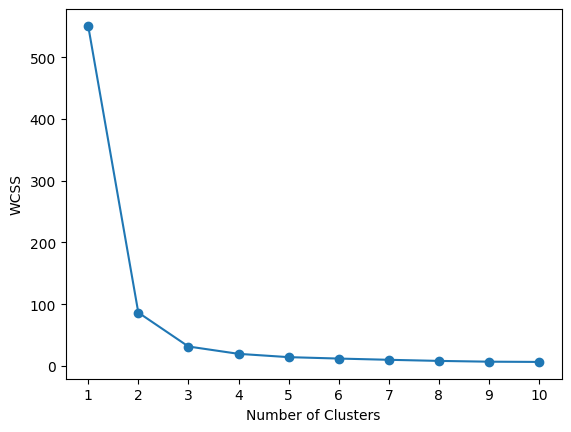

In [15]:
plt.plot(range(1, 11), inertia, marker='o')
plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Clusters'] = kmeans.fit_predict(X)

In [34]:
centers = kmeans.cluster_centers_
centers

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

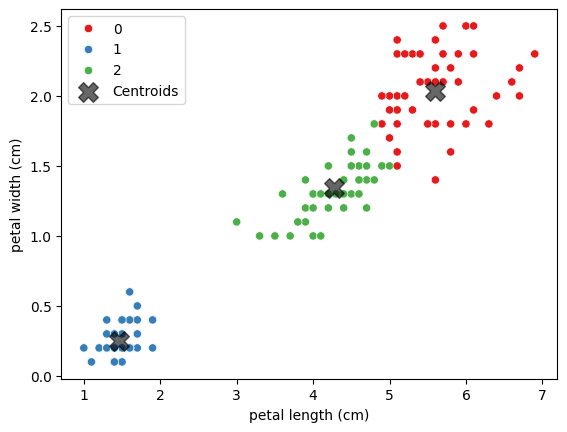

In [35]:
sns.scatterplot(x=X['petal length (cm)'], y=X['petal width (cm)'], hue=df['Clusters'], palette='Set1')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.6, marker='X', label='Centroids')
plt.legend()
plt.show()

In [39]:
sample = df.sample(1)
sample

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Clusters,Actual
42,4.4,3.2,1.3,0.2,1,0


In [40]:
kmeans.predict(sample[['petal length (cm)', 'petal width (cm)']])

array([1], dtype=int32)